# **Functional API**

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense, concatenate
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [ ]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

## 2.데이터 준비

### (1) 데이터 준비

In [ ]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [ ]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링 : Sequential API vs Function API

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

### (1) Sequential

In [ ]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )),
                    Dense(18, activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(1) ])

model.summary()

### (2) Functional

In [ ]:
clear_session()

il = Input(shape=(nfeatures, ))
hl1 = Dense(18, activation='relu')(il)
hl2 = Dense(4, activation='relu')(hl1)
ol = Dense(1)(hl2)

model = Model(inputs = il, outputs = ol)

model.summary()

* 컴파일 + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

hist = model.fit(x_train, y_train, epochs = 50, validation_split= 0.2).history

* 학습곡선

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred = model.predict(x_val)

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

### (3) 실습1
다음의 Sequential API 코드를 Functional API로 변환해서 수행해 봅시다.

In [ ]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )),
                    Dense(18, activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(4, activation='relu') ,
                    Dense(1) ])

model.summary()

### (4) 실습2
다음 구조로 모델링 하시오. 단 Functional API 로 코딩하시오.

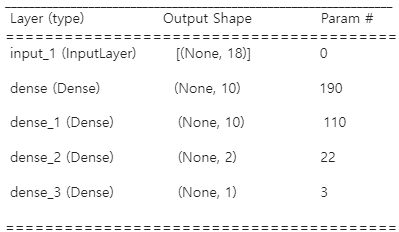

## 4.다중 입력


### (1) 입력 준비

* 아래 코드는 다중 입력 모델을 연습하기 위해 임의로 변수를 구분
* 성능과 상관없이 다중 입력 연습을 위한 것입니다.

#### 1) 기본 전처리

In [ ]:
# 데이터 분할 : x, y
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

# 데이터 분할 : train, val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_val = pd.DataFrame(x_val, columns=x.columns)

In [ ]:
x_train.head()

#### 2) 입력 나누기

* 입력1 : 판매 관련 정보 : Advertising, Price, ShelveLoc, US, Urban, CompPrice
* 입력2 : 외부 환경 정보 : Income, Population, Age, Education


In [ ]:
# 입력1
in_col = ['Advertising','Price','CompPrice','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_Yes']
x_train1 = x_train[in_col]
x_val1 = x_val[in_col]
x_val1.head()

In [ ]:
# 입력2
x_train2 = x_train.drop(in_col, axis = 1)
x_val2 = x_val.drop(in_col, axis = 1)
x_val2.head()

### (2) 다중 입력 모델링

In [ ]:
nfeatures1 = x_train1.shape[1]
nfeatures2 = x_train2.shape[1]

print(nfeatures1, nfeatures2)

In [ ]:
# 모델 구성
input_1 = Input(shape=(nfeatures1,), name='input_1')
input_2 = Input(shape=(nfeatures2,), name='input_2')

# 첫 번째 입력을 위한 레이어
hl1_1 = Dense(10, activation='relu')(input_1)

# 두 번째 입력을 위한 레이어
hl1_2 = Dense(20, activation='relu')(input_2)

# 두 히든레이어 결합
cbl = concatenate([hl1_1, hl1_2])

# 추가 히든레이어
hl2 = Dense(8, activation='relu')(cbl)

# 출력 레이어
output = Dense(1)(hl2)

# 모델 선언
model = Model(inputs = [input_1, input_2], outputs = output)

model.summary()

In [ ]:
# 컴파일
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

# 학습
hist = model.fit([x_train1, x_train2], y_train, epochs=50, validation_split=.2).history

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred = model.predict([x_val1, x_val2])

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

## 5.실습

* 보스턴 집값 데이터를 이용해서 입력을 2개로 나누고 모델링을 수행하시오.
* 입력을 나눌 때, 임의로 나눠도 좋고, 어떠한 관점을 가지고 나눠도 좋습니다.



![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율 |
|	indus	|	산업단지 면적비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	고속도로 진입로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


### (1) 데이터 준비

* 데이터 로딩

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

* 기본 전처리

In [ ]:
# 데이터 분할 : x, y
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 데이터 분할 : train, val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_val = pd.DataFrame(x_val, columns=x.columns)

In [ ]:
x_train.head()

### (2) 입력 나누기

In [ ]:
# 입력1 : 주택과 직접 관련이 있는 변수들
in_col = [ ]



In [ ]:
# 입력2 : 주택과 간접 관련이 있는 변수들




### (3) 다중 입력 모델링

* 모델 선언

In [ ]:
# 입력



# 첫 번째 입력을 위한 레이어



# 두 히든레이어 결합


# 추가 히든레이어


# 출력 레이어


# 모델 선언



* 컴파일 및 학습

In [ ]:
# 컴파일


# 학습


In [ ]:
# 학습곡선 확인


* 검증